# Exercise 1.2: Charts
#### Scott Breitbach
#### DSC640 - 12/10/2021

# Plots Using **Python**

## Load Data

In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
# Load data
dogDF = pd.read_excel('hotdog-contest-winners.xlsm')
thanksObama = pd.read_excel('obama-approval-ratings.xls', index_col='Issue')

# Add column combining year and winner
dogDF['Year_Winner'] = dogDF['Winner'] + " " + dogDF['Year'].astype(str)

# Define Seaborn color palatte
colors = sns.color_palette('colorblind')

<div style="page-break-after: always;"></div>

## Bar Chart

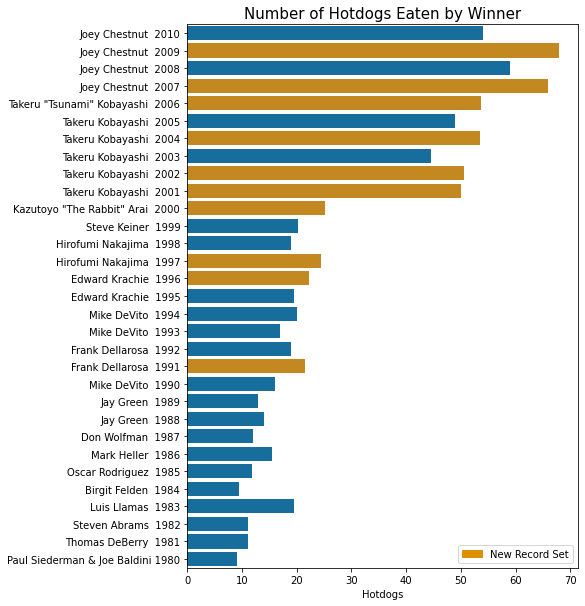

In [3]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(7, 10))

# Set color palette
colors = sns.color_palette('colorblind')
recordColor = colors[1]

# Plot dogs by winner
sns.barplot(x='Dogs eaten', y='Year_Winner', data=dogDF, 
            hue=dogDF['New record'], dodge=False, palette=colors, 
            order=dogDF.sort_values('Year', ascending=False)['Year_Winner'])

# Set up legend and titles
newRecord = mpatches.Patch(color=recordColor, label='New Record Set')
ax.legend(handles=[newRecord], loc="lower right")
ax.set(ylabel="", xlabel="Hotdogs")
ax.set_title("Number of Hotdogs Eaten by Winner", fontdict={'fontsize': 15})

# Save plot
plt.savefig('Plots/Python-Bar.png', bbox_inches="tight")

<div style="page-break-after: always;"></div>

## Stacked Bar Chart

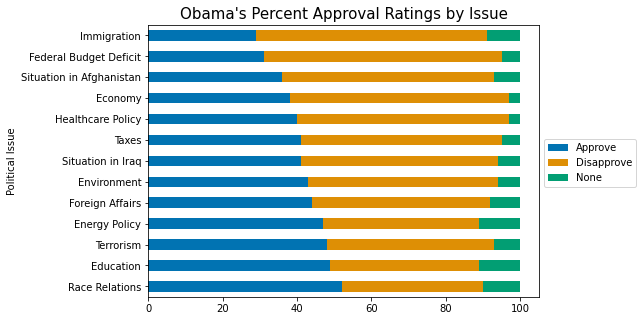

In [4]:
# Set up stacked bar plot
thanksObama.plot(kind='barh', stacked=True, color=colors, figsize=(7, 5),
                      xlabel="Political Issue").legend(bbox_to_anchor=(1, .6))

# Set up chart title
plt.title("Obama's Percent Approval Ratings by Issue", fontsize=15)

# Save plot
plt.savefig('Plots/Python-StackedBar.png', bbox_inches="tight")

<div style="page-break-after: always;"></div>

## Pie Chart

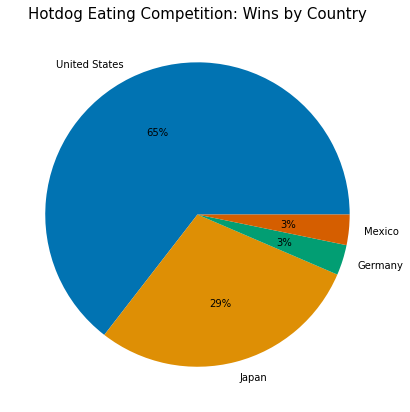

In [5]:
# Set up index of country labels, sorted by number of instances
countryLabels = dogDF.groupby('Country')['Year'].nunique().sort_values(ascending=False).index

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(7, 7))

# Create pie chart
plt.pie(dogDF['Country'].value_counts(), autopct='%.0f%%',
        labels=countryLabels, colors=colors)

# Set up chart title
plt.title("Hotdog Eating Competition: Wins by Country", fontsize=15)

# Save plot
plt.savefig('Plots/Python-mmmPie.png', bbox_inches="tight")

<div style="page-break-after: always;"></div>

## Donut Chart

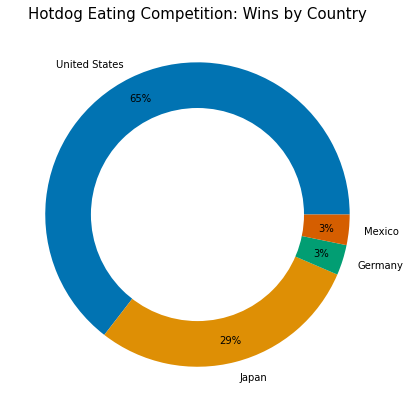

In [6]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(7, 7))

# Create pie chart
plt.pie(dogDF['Country'].value_counts(), autopct='%.0f%%', labels=countryLabels, colors=colors, pctdistance=0.85)#, explode=explode)
plt.show

# Draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Set up chart title
plt.title("Hotdog Eating Competition: Wins by Country", fontsize=15)

# Save plot
plt.savefig('Plots/Python-mmmDonut.png', bbox_inches="tight")